In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# # Classification Metrics
from sklearn.metrics import confusion_matrix,classification_report

# selecting common working idrectory to allow use of pre_processing.py
import os
os.chdir('/Users/DE7/Desktop/LearningPython/XYZ-Corp')

# loading trained model with pickle
import pickle

In [56]:
def multi_class_confusion_matrix(confusion_matrix, class_names, figsize = (15,6), fontsize=16, save = False):
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax1, cmap='Reds', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax1.tick_params(axis='x', labelrotation=45, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #reverse order of plotting
    ax1.set_xlabel('Predicted Loan Purpose', fontsize=fontsize, color='black')
    ax1.set_ylabel('True Loan Purpose', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Class Counts', fontsize=fontsize, color='black')    
         
    if save:
        fig.savefig('nlp_problem/visualizations/confusion_matrix2.png')

In [57]:
# Load individual classifiers
ovr_rfc = pickle.load(open('nlp_problem/saved_models/one_v_rest_random_forest.sav', 'rb'))

# Loading common test data
X_test = pd.read_csv('nlp_problem/nlp_test_data/X_test.csv', sep = '|').drop('Unnamed: 0', axis = 1)
y_test = pd.read_csv('nlp_problem/nlp_test_data/y_test.csv', sep = '|').drop('Unnamed: 0', axis = 1)

In [58]:
ovr_rfc.score(list(X_test.desc), list(y_test.loan_intention_group))

0.9164688169552377

In [59]:
y_pred = ovr_rfc.predict(list(y_test.loan_intention_group)) 

print(classification_report(y_test,y_pred, zero_division=0))

                    precision    recall  f1-score   support

               car       1.00      1.00      1.00       587
debt_consolidation       0.97      1.00      0.98     29516
       educational       0.00      0.00      0.00        87
             house       1.00      1.00      1.00      2433
           medical       1.00      1.00      1.00       302
            moving       1.00      1.00      1.00       237
  renewable_energy       0.00      0.00      0.00        39
    small_business       0.00      0.00      0.00       794
          vacation       1.00      1.00      1.00       172
           wedding       1.00      1.00      1.00       371

          accuracy                           0.97     34538
         macro avg       0.70      0.70      0.70     34538
      weighted avg       0.95      0.97      0.96     34538



In [62]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [60]:
classes = ['car',
'debt_consolidation',
'educational',
'house',
'medical',
'moving',
'renewable_energy',
'small_business',
'vacation',
'wedding']

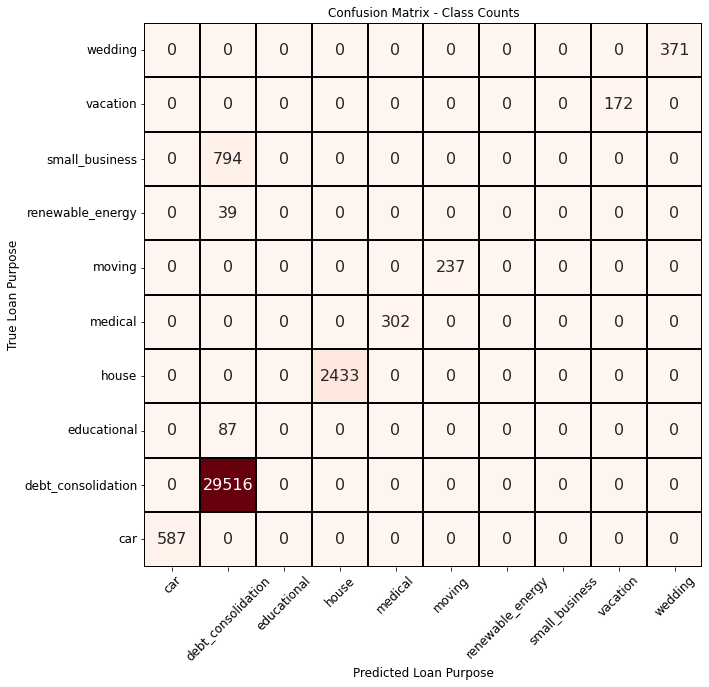

In [61]:
cm=confusion_matrix(y_test, y_pred, labels=classes)
multi_class_confusion_matrix(confusion_matrix=cm, class_names=classes, figsize = (10,10), fontsize=12, save= True)